# Exercises

## Set Up

You will create partial dependence plots with data from the [Taxi Fare Prediction](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction) competition.

You will again start with code to do the basic loading, review and model-building.


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


data = pd.read_csv('../input/new-york-city-taxi-fare-prediction/train.csv', nrows=50000)

# Remove data with extreme outlier coordinates or negative fares
data = data.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                  'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                  'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                  'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                  'fare_amount > 0'
                  )

y = data.fare_amount

base_features = ['pickup_longitude',
                 'pickup_latitude',
                 'dropoff_longitude',
                 'dropoff_latitude']

X = data[base_features]


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
first_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(train_X, train_y)
print("Data sample:")
data.head()

Data sample:


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1


In [2]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,31289.000000,31289.000000,31289.000000,31289.000000,31289.000000,31289.000000
mean,8.483093,-73.976860,40.756917,-73.975342,40.757473,1.656141
std,4.628164,0.014635,0.018170,0.015917,0.018661,1.284899
min,0.010000,-73.999999,40.700013,-73.999999,40.700020,0.000000
25%,5.500000,-73.988039,40.744947,-73.987125,40.745922,1.000000
50%,7.500000,-73.979691,40.758027,-73.978547,40.758559,1.000000
75%,10.100000,-73.967823,40.769580,-73.966435,40.770427,2.000000
max,165.000000,-73.900062,40.799952,-73.900062,40.799999,6.000000


## Q1

Here is the code to plot the partial dependence plot for pickup_longitude.  Run the following cell.

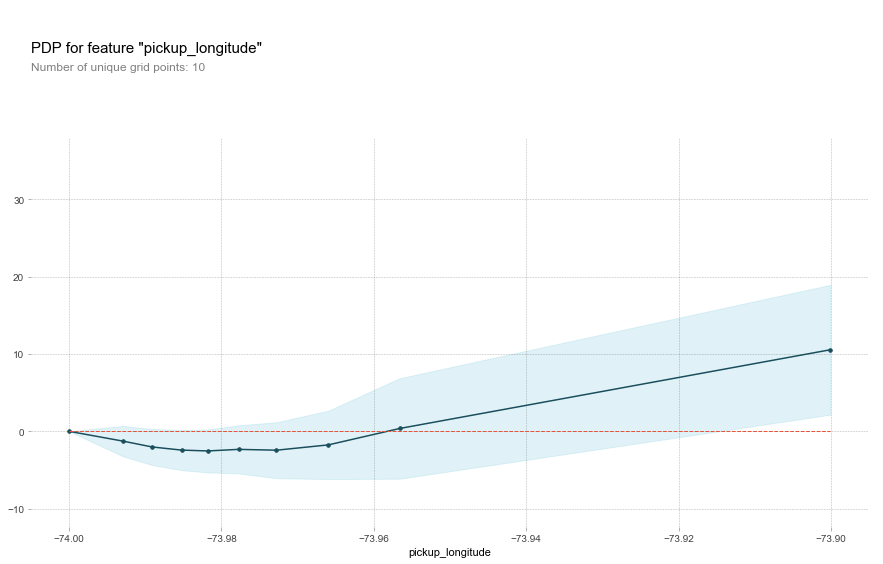

In [3]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

feat_name = 'pickup_longitude'
pdp_dist = pdp.pdp_isolate(model=first_model, dataset=val_X, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

Why does the partial dependence plot have this U-shape?

Does your explanation suggest what shape to expect in the partial plots for the other features?

Create the other partial plots below

In [4]:
for feat_name in base_features:
    pdp_dist = _
    _
    plt.show()

Why do these all have U-shapes?  Uncomment the following line to check your intuition.


In [5]:
q1.solution()

NameError: name 'q1' is not defined

## Q2

Now you will run a 2D partial dependence plot.  As a reminder, here is the code from the tutorial.  

```
inter1  =  pdp.pdp_interact(model=my_model, dataset=val_X, model_features=feature_names, features=['Goal Scored', 'Distance Covered (Kms)'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['Goal Scored', 'Distance Covered (Kms)'], plot_type='contour')
plt.show()
```

Create a 2D plot for the features `pickup_longitude` and `dropoff_longitude`.  Plot it appropriately?

What do you expect it to look like?

In [ ]:
fnames = ['pickup_longitude', 'dropoff_longitude']

longitudes_partial_plot  =  pdp.pdp_interact(model=first_model, dataset=val_X, model_features=base_features, features=fnames)

pdp.pdp_interact_plot(pdp_interact_out=longitudes_partial_plot, feature_names=fnames, plot_type='contour')
plt.show()

## Q3
Consider a ride starting at longitude -73.92 and ending at longitude -74. Using the graph above, estimate how much money the rider would have saved if they'd started the ride at longitude -73.98 instead?

In [ ]:
savings_from_shorter_trip = _

# Uncomment the line below to check your answer
# q4.check()

For a solution or hint, uncomment the appropriate line below.

In [ ]:
# q4.hint()
# q4.solution()

## Q4
In the PDP's you've seen so far, location features have primarily served as a proxy to capture distance traveled. In the permutation importance lessons, you added the features `abs_lon_change` and `abs_lat_change` as a more direct measure of distance.

Create these features again here, include them when training a model, and create the partial dependence plot for `pickup_longitude` on this new model.

---

In [ ]:
# create new features
data['abs_lon_change'] = abs(data.dropoff_longitude - data.pickup_longitude)
data['abs_lat_change'] = abs(data.dropoff_latitude - data.pickup_latitude)

features_2  = ['pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'abs_lat_change',
               'abs_lon_change']

X = data[features_2]
new_train_X, new_val_X, new_train_y, new_val_y = train_test_split(X, y, random_state=1)
second_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(new_train_X, new_train_y)

feat_name = 'pickup_longitude'
pdp_dist = pdp.pdp_isolate(model=second_model, dataset=new_val_X, model_features=features_2, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

# uncomment the line below to check your answer
# q4.check()

Uncomment the lines below to see a hint or the solution.

In [ ]:
# q4.hint()
# q4.solution()

How do the results differ from the PDP for `pickup_longitude` when you didn't have these additional features? Be sure to notice any differences in the values on the vertical axis, rather than looking only at the shape.

## Q5
Consider a scenario where you have only 2 predictive features, which we will call `feat_A` and `feat_B`. Both features have minimum values of -1 and maximum values of 1.  The partial dependence plot for `feat_A` increases steeply over its whole range, whereas the partial dependence plot for feature B increases at a slower rate (less steeply) over its whole range.

Does this guarantee that `feat_A` will have a higher permutation importance than `feat_B`.  Why or why not?

## Q6
Create a dataset with the following characteristics:
- There are 2 predictive features and a target
- Each predictive feature has a range from -2 to 2.
- The PDP of your first feature (called `X1`) has a positive slope from [-1,1], and a negative slope everywhere else.

*Note: You are supplied the code to create the predictive features, and you only need to create y*

In [ ]:
from numpy.random import rand

n_samples = 1000

# Create array holding predictive feature
X1 = 4 * rand(n_samples) - 2
X2 = 4 * rand(n_samples) - 2
# Create y. you should have X in the expression for y
y = -2 * X1 * (X1<-1) + X1 - 2 * X1 * (X1>1) - X2


# create dataframe because pdp_isolate expects a dataFrame as an argument
my_df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
predictors_df = my_df.drop(['y'], axis=1)

my_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(predictors_df, my_df.y)


pdp_dist = pdp.pdp_isolate(model=my_model, dataset=my_df, model_features=['X1', 'X2'], feature='X1')

pdp.pdp_plot(pdp_dist, 'X1')
plt.show()

plt.scatter(X1, y)
plt.show()

## Q7
Create a dataset with 2 features and a target, such that the pdp of the first feature is flat, but its permutation importance is high.  We will use a RandomForest for both models.

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

n_samples = 2000

# Create array holding predictive feature
X1 = 4 * rand(n_samples) - 2
X2 = 4 * rand(n_samples) - 2
# Create y. you should have X in the expression for y
y = X1 * X2


# create dataframe because pdp_isolate expects a dataFrame as an argument
my_df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
predictors_df = my_df.drop(['y'], axis=1)

my_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(predictors_df, my_df.y)


pdp_dist = pdp.pdp_isolate(model=my_model, dataset=my_df, model_features=['X1', 'X2'], feature='X1')

pdp.pdp_plot(pdp_dist, 'X1')
plt.show()

perm = PermutationImportance(my_model).fit(predictors_df, my_df.y)

# show the weights for the permutation importance you just calculated
eli5.show_weights(perm, feature_names = ['X1', 'X2'])

# Uncomment the following line to check your answer. It will show the partial plot and permutation importance too
# q7.check()

In [ ]:
# Uncomment the following lines for the hint or solution
# q7.hint()
# q7.solution()